<a href="https://colab.research.google.com/github/ShreshtaPrabhu/ShreshtaPrabhu/blob/main/--.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**NYC Traffic** **Accident**
---





Everyone loves New York City. Nobody likes car accidents. Why bother looking at the motor vehicle collision data? Well, road safety is by any means a critical issue, and is relevant to everyone's daily life. It's inevitable, and more often than not, a life-or-death situation. Therefore, it is very important to look at the past collision history data and see what we can learn from the data to help better prevent and/or avoid collisions in the future. 

## Content

Looking at such a comprehensive data set, some interesting questions directly jumped into mind are:

How is the data look like on a map? Can we find particularly more dangerous/risky regions of concern? What their collision history data look like, can we get any useful insight?...

Especially for cases with walker injured/killed and the cases with people killed in general, are their distribution over location and/or time shows any significant different pattern/feature than the overall cases? Can we identify particular dangerous spots/areas for pedestrians, cyclists, or the lethal collisions, etc. ? ...

What are the top, say 20, most often seen collision causes and involved types of vehicles? What can learn from it? ...

## Source & Acknowledgements

Observations and advanced EDA can be accessed [here](https://toddwschneider.com/maps/nyc-motor-vehicle-collisions/) 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

In [9]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
path = "/content/drive/My Drive/Classroom/Veritas AI Scholars Fall 1.2/NYC-Accidents-2020.csv"
data = pd.read_csv(path)
data.head(3)

CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2020-08-29   15:40:00     BRONX   10466.0   40.8921 -73.833760   
1  2020-08-29   21:00:00  BROOKLYN   11221.0   40.6905 -73.919914   
2  2020-08-29   18:20:00       NaN       NaN   40.8165 -73.946556   

                     LOCATION   ON STREET NAME CROSS STREET NAME  \
0   POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1  POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2  POINT (-73.946556 40.8165)         8 AVENUE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                    Unspecified   
1             NaN  ...                    Unspecified   
2             NaN  ...                            NaN   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4342908   
1                            NaN       4343555   
2                            NaN       4343142   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan  Station Wagon/Sport Utility Vehicle   
1                                Sedan                                Sedan   
2  Station Wagon/Sport Utility Vehicle                                  NaN   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  

[3 rows x 29 columns]

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Veritas AI Scholars Fall 1.2/NYC-Accidents-2020.csv')
df.head()

CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2020-08-29   15:40:00     BRONX   10466.0  40.89210 -73.833760   
1  2020-08-29   21:00:00  BROOKLYN   11221.0  40.69050 -73.919914   
2  2020-08-29   18:20:00       NaN       NaN  40.81650 -73.946556   
3  2020-08-29   00:00:00     BRONX   10459.0  40.82472 -73.892960   
4  2020-08-29   17:10:00  BROOKLYN   11203.0  40.64989 -73.933890   

                     LOCATION   ON STREET NAME CROSS STREET NAME  \
0   POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1  POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2  POINT (-73.946556 40.8165)         8 AVENUE               NaN   
3  POINT (-73.89296 40.82472)              NaN               NaN   
4  POINT (-73.93389 40.64989)              NaN               NaN   

       OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                  NaN  ...                    Unspecified   
1                  NaN  ...                    Unspecified   
2                  NaN  ...                            NaN   
3  1047 SIMPSON STREET  ...                    Unspecified   
4   4609 SNYDER AVENUE  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                    Unspecified                    Unspecified   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4342908   
1                            NaN       4343555   
2                            NaN       4343142   
3                            NaN       4343588   
4                            NaN       4342953   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan  Station Wagon/Sport Utility Vehicle   
1                                Sedan                                Sedan   
2  Station Wagon/Sport Utility Vehicle                                  NaN   
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
4                                Sedan                                Sedan   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                Sedan          Motorcycle                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [13]:
df.shape

(74881, 29)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [15]:
df.describe()

ZIP CODE      LATITUDE     LONGITUDE  NUMBER OF PERSONS INJURED  \
count  49134.000000  68935.000000  68935.000000               74881.000000   
mean   10913.681585     40.689825    -73.843376                   0.366555   
std      515.069483      1.233368      2.234881                   0.726178   
min    10000.000000      0.000000    -74.253006                   0.000000   
25%    10458.000000     40.667076    -73.958680                   0.000000   
50%    11210.000000     40.716885    -73.916850                   0.000000   
75%    11354.000000     40.789445    -73.862630                   1.000000   
max    11697.000000     40.912884      0.000000                  15.000000   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count              74881.000000                   74881.000000   
mean                   0.001923                       0.054740   
std                    0.047609                       0.237582   
min                    0.000000                       0.000000   
25%                    0.000000                       0.000000   
50%                    0.000000                       0.000000   
75%                    0.000000                       0.000000   
max                    4.000000                       6.000000   

       NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
count                  74881.000000               74881.000000   
mean                       0.000748                   0.043709   
std                        0.027337                   0.209737   
min                        0.000000                   0.000000   
25%                        0.000000                   0.000000   
50%                        0.000000                   0.000000   
75%                        0.000000                   0.000000   
max                        1.000000                   3.000000   

       NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
count              74881.000000                74881.000000   
mean                   0.000120                    0.268105   
std                    0.010963                    0.691423   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
max                    1.000000                   15.000000   

       NUMBER OF MOTORIST KILLED  COLLISION_ID  
count               74881.000000  7.488100e+04  
mean                    0.001055  4.305762e+06  
std                     0.037073  2.171658e+04  
min                     0.000000  4.063247e+06  
25%                     0.000000  4.287041e+06  
50%                     0.000000  4.305812e+06  
75%                     0.000000  4.324545e+06  
max                     4.000000  4.343622e+06

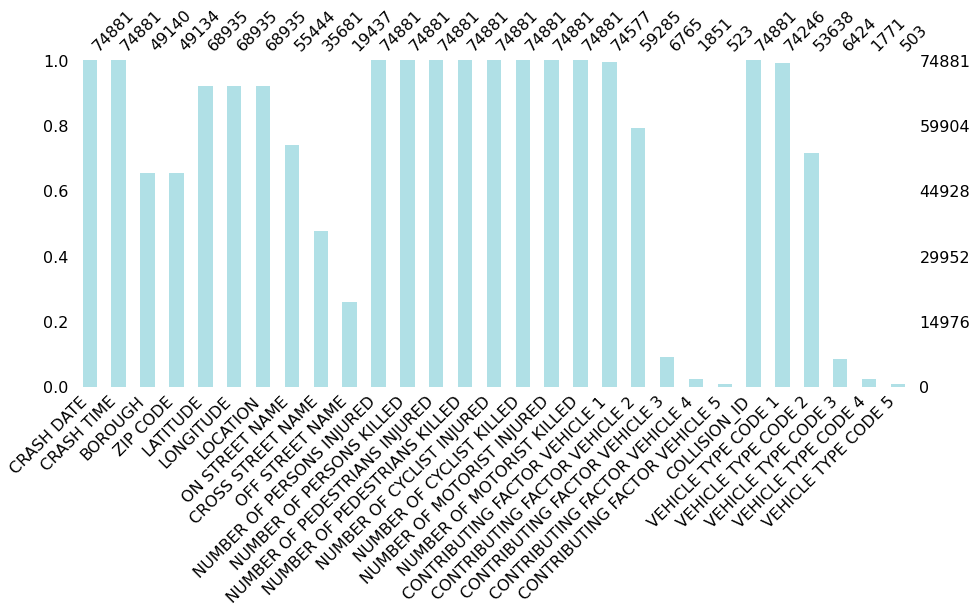

In [16]:
msno.bar(df, figsize=(15,6), color='powderblue')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Missing values for NUMBER OF PERSONS INJURED:  False


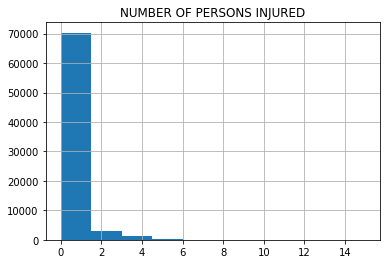


Missing values for NUMBER OF PERSONS KILLED:  False


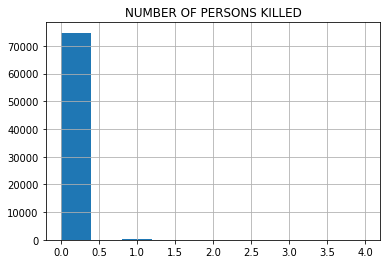


Missing values for NUMBER OF PEDESTRIANS INJURED:  False


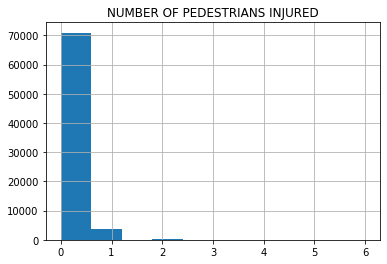


Missing values for NUMBER OF PEDESTRIANS KILLED:  False


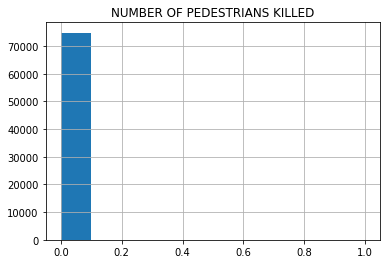


Missing values for NUMBER OF CYCLIST INJURED:  False


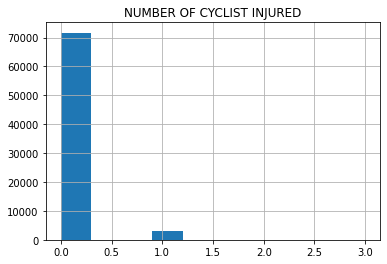


Missing values for NUMBER OF CYCLIST KILLED:  False


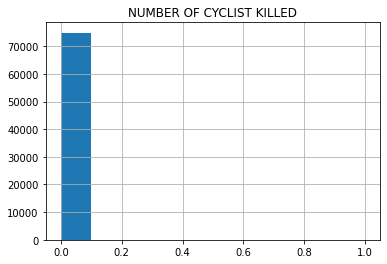


Missing values for NUMBER OF MOTORIST INJURED:  False


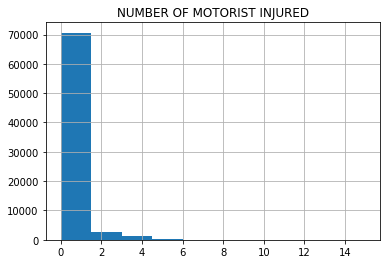


Missing values for NUMBER OF MOTORIST KILLED:  False


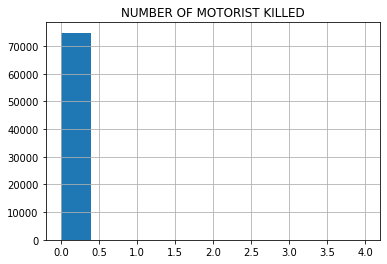

In [17]:
# Your code here
missing_vals = data['NUMBER OF PERSONS INJURED'].isna().sum()
print("Missing values for NUMBER OF PERSONS INJURED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF PERSONS INJURED'].hist()
plt.title('NUMBER OF PERSONS INJURED')
plt.show()
print()

missing_vals = data['NUMBER OF PERSONS KILLED'].isna().sum()
print("Missing values for NUMBER OF PERSONS KILLED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF PERSONS KILLED'].hist()
plt.title('NUMBER OF PERSONS KILLED')
plt.show()
print()

missing_vals = data['NUMBER OF PEDESTRIANS INJURED'].isna().sum()
print("Missing values for NUMBER OF PEDESTRIANS INJURED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF PEDESTRIANS INJURED'].hist()
plt.title('NUMBER OF PEDESTRIANS INJURED')
plt.show()
print()

missing_vals = data['NUMBER OF PEDESTRIANS KILLED'].isna().sum()
print("Missing values for NUMBER OF PEDESTRIANS KILLED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF PEDESTRIANS KILLED'].hist()
plt.title('NUMBER OF PEDESTRIANS KILLED')
plt.show()
print()

missing_vals = data['NUMBER OF CYCLIST INJURED'].isna().sum()
print("Missing values for NUMBER OF CYCLIST INJURED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF CYCLIST INJURED'].hist()
plt.title('NUMBER OF CYCLIST INJURED')
plt.show()
print()

missing_vals = data['NUMBER OF CYCLIST KILLED'].isna().sum()
print("Missing values for NUMBER OF CYCLIST KILLED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF CYCLIST KILLED'].hist()
plt.title('NUMBER OF CYCLIST KILLED')
plt.show()
print()

missing_vals = data['NUMBER OF MOTORIST INJURED'].isna().sum()
print("Missing values for NUMBER OF MOTORIST INJURED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF MOTORIST INJURED'].hist()
plt.title('NUMBER OF MOTORIST INJURED')
plt.show()
print()

missing_vals = data['NUMBER OF MOTORIST KILLED'].isna().sum()
print("Missing values for NUMBER OF MOTORIST KILLED: ", (missing_vals > 0))
if missing_vals > 0:
  print("    Missing", missing_vals, "data points")
data['NUMBER OF MOTORIST KILLED'].hist()
plt.title('NUMBER OF MOTORIST KILLED')
plt.show()

In [18]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Total_fatalities'] = df['NUMBER OF PERSONS KILLED'] + df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED']
df['Total_injured'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED']
df['Total_victims'] = df['Total_fatalities'] + df['Total_injured']

In [20]:
fig = px.scatter(df,x='CRASH DATE',y='Total_fatalities')

fig.update_traces(marker=dict(color='tomato'))

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'Accident Fatalities By Date In NYC',
                        'x':0.45,'y':0.9})
fig.show()
print()

In [ ]:
fig = px.scatter(df,x='CRASH DATE',y='Total_injured')

fig.update_traces(marker=dict(color='purple'))

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'Accident Injury By Date In NYC',
                        'x':0.45,'y':0.9})
fig.show()

In [ ]:
df['Month'] = df['CRASH DATE'].dt.month

fig = px.bar(x = df['Month'].value_counts().index,
            y=df['Month'].value_counts(),
            text=(df['Month'].value_counts()/len(df['Month'])*100),
            title='Overall No. Of Accidents Per Month')

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')
fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

In [ ]:
df['quarter'] = df['CRASH DATE'].dt.quarter

fig = px.bar(x = df['quarter'].value_counts().index,
            y=df['quarter'].value_counts(),
            text=(df['quarter'].value_counts()/len(df['quarter'])*100),
            title='No. Of Accidents Per Quarter')

fig.add_annotation(x=2 ,y=45000,
                   text='No of accidents in first quarter are almost 2 times higher than other quarters.',
                  showarrow=False)

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

**No of Accidents were condiderably higher in the first quarter**

In [3]:
df['day_name'] = df['CRASH DATE'].dt.day_name()

fig = px.bar(x = df['day_name'].value_counts().index,
            y=df['day_name'].value_counts(),
            text=(df['day_name'].value_counts()/len(df['day_name'])*100),
            title='Overall No. Of Accidents Per WeekDay')

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()
print()

NameError: ignored

**The accidents are high on Thursday and Friday.**

In [ ]:
df['WOY'] = df['CRASH DATE'].dt.isocalendar().week

fig = px.bar(x = df['WOY'].value_counts().index,
            y=df['WOY'].value_counts(),
            text=(df['WOY'].value_counts()/len(df['WOY'])*100),
            title='Overall No. Of Accidents Per Week Of Year')

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

**No. of accidents are a lot higher in first quarter of the yeat than the other**

In [ ]:
df['Day'] = df['CRASH DATE'].dt.day

fig = px.bar(x = df['Day'].value_counts().index,
            y=df['Day'].value_counts(),
            text=(df['Day'].value_counts()/len(df['Day'])*100),
            title='Overall No. Of Accidents By Day of the Month')

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

**There is no noticeable spike/dip in trends.**

In [ ]:
df['DOY'] = df['CRASH DATE'].dt.dayofyear

fig = px.bar(x = df['DOY'].value_counts().index,
            y=df['DOY'].value_counts(),
            text=(df['DOY'].value_counts()/len(df['DOY'])*100),
            title='Overall No. Of Accidents By Day of the Year')

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

In [ ]:
df['weekday'] =( df['Day'] // 5 != 1).astype(float)

fig = px.bar(x = df['weekday'].value_counts().index,
            y=df['weekday'].value_counts(),
            text=(df['weekday'].value_counts()/len(df['weekday'])*100),
            title='Overall No. Of Accidents On Weekdays & Weekends')

fig.add_annotation(x=0.3,y=60000,
                  text='No. of accidents are ~3 times high on weekdays as compare to weekends',
                  showarrow=False)

fig.update_traces(marker=dict(color='mintcream', line=dict(color='teal')),
                 texttemplate= '%{text:.4s}%',
                 textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

In [ ]:
fig = px.box(df,x='weekday',
            y='Total_fatalities')

fig.update_layout(margin={'b':0,'l':0,'r':0,},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'No. of Fatalities on Weekdays & Weekends',
                        'x':0.45,'y':0.9})
fig.show()

In [ ]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])
df['period'] = (df['CRASH TIME'].dt.hour % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [ ]:
period = df['period'].value_counts()

fig = px.pie(names = period.index,
            values=period,
            height=450,
            )
fig.update_traces(textinfo='percent',
            insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Pastel2))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'No. of Accidents In Different Part Of Day',
                        'x':0.45,'y':0.9})
fig.show()

In [ ]:
df['Hour'] = df['CRASH TIME'].dt.hour

ax = df.groupby('day_name')['Hour'].value_counts().reset_index(name='Count')

fig = px.scatter(ax, x='Hour', y="Count", color='Hour', facet_col="day_name",
                facet_col_wrap=4)

fig.update_yaxes(matches=None)


fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'No. of Accidents In Different Paart Of Day',
                        'x':0.45,'y':0.9})
fig.show()

Accidents seems to increase during Rush hours(13:00,19:00) .

In [ ]:
town = df.dropna(axis=0, subset=('BOROUGH', ))

fig = px.bar(x=town['BOROUGH'].value_counts().index,
             y=town['BOROUGH'].value_counts(),
             text= df['BOROUGH'].value_counts()/len(town['BOROUGH'])*100,
            title='No. Of Accidents In Different DIstrict In NYC')

fig.add_annotation(x=1.5,y=16000,showarrow=False,
                 text='Brooklyn, Queens & Bronx are top 3 district where accidents are high')

fig.update_traces(texttemplate='%{text:.4s}%',
                 textposition='outside',
                 marker=dict(color='mintcream',line=dict(color='teal')))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

**Brooklyn is the most dangerous NYC district.**

In [ ]:
street_name = df['ON STREET NAME'].value_counts().sort_values(ascending=False).head(10)

fig = px.bar(x=street_name.index,
            y=street_name,
            title='Top 10 Streets Of Accidents',
            height=900,
            text=street_name)

fig.add_annotation(x=4,y=1000,
                  text='No. of Accidents on Belt Parkway street are a lot higher than other streets',
                  showarrow=False)

fig.update_traces(texttemplate='%{text:.4s}',
                 textposition='outside',
                 marker=dict(color='lightpink',line=dict(color='tomato')))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':50},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.update_xaxes(
        tickangle = 60,
        title_font = {"size": 20},
        title_standoff = 25)
fig.show()

**Belt Parkway is the most dangerous street in NYC.**

In [ ]:
street = town = df.dropna(axis=0, subset=('ON STREET NAME',))

fig = px.scatter_mapbox(street, lat="LATITUDE", lon="LONGITUDE", hover_name="ON STREET NAME", hover_data=["ON STREET NAME", "Total_fatalities"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=500,size='Total_fatalities')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
factor = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

fig = px.bar(x=factor.index,
            y=factor,
            title='Causes of Road Accidents',
            height=1000,
            text=df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()/len(df['CONTRIBUTING FACTOR VEHICLE 1'])*100)

fig.add_annotation(x=20,y=18000,
                  text="Driver's Inattention is major cause of road accidents followed by following too closely ",
                  showarrow=False)

fig.update_traces(texttemplate='%{text:.4s}%',
                 textposition='outside',
                 marker=dict(color='lightpink',line=dict(color='tomato')))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.update_xaxes(
        tickangle = 60,
        title_font = {"size": 20},
        title_standoff = 25)
fig.show()

**Driver negligence/distraction is a top cause of Traffic Accidents.**

In [ ]:
factor_fatalities = df.groupby('CONTRIBUTING FACTOR VEHICLE 1')['Total_fatalities'].sum().reset_index().sort_values(by='Total_fatalities',ascending=False).head(10)

fig = px.bar(x=factor_fatalities['CONTRIBUTING FACTOR VEHICLE 1'],
             y=factor_fatalities['Total_fatalities'],
             title='Top 10 Fatalities Factors In Road Accidents',
             text=factor_fatalities['Total_fatalities'],
            height=800)

fig.add_annotation(x=4,y=85,
                   text="Unsafe Driving Cause More death in road accidents followed by traffigc control disregarded & driver's inattention ",
                  showarrow=False)

fig.update_traces(texttemplate='%{text:.2s}',
                 textposition='outside',
                 marker=dict(color='lightpink',line=dict(color='tomato')))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':1})
fig.update_xaxes(
        tickangle = 60,
        title_font = {"size": 20},
        title_standoff = 25)
fig.show()

**Unsafe speed is the cause for most Traffic Accidents.**

In [ ]:
street_name

BELT PARKWAY                  1241
LONG ISLAND EXPRESSWAY         745
BROOKLYN QUEENS EXPRESSWAY     738
FDR DRIVE                      728
MAJOR DEEGAN EXPRESSWAY        591
GRAND CENTRAL PKWY             581
BROADWAY                       575
ATLANTIC AVENUE                532
CROSS BRONX EXPY               526
CROSS ISLAND PARKWAY           512
Name: ON STREET NAME, dtype: int64

In [ ]:
factor = df[df["ON STREET NAME"] == "BELT PARKWAY"]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

fig = px.bar(x=factor.index,
            y=factor,
            title='Causes of Road Accidents',
            height=1000,
            text=df[df["ON STREET NAME"] == "BELT PARKWAY"]['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()/len(df[df["ON STREET NAME"] == "BELT PARKWAY"]['CONTRIBUTING FACTOR VEHICLE 1'])*100)

fig.add_annotation(x=20,y=180,
                  text="Driver's Inattention is major cause of road accidents followed by following too closely ",
                  showarrow=False)

fig.update_traces(texttemplate='%{text:.4s}%',
                 textposition='outside',
                 marker=dict(color='lightpink',line=dict(color='tomato')))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.update_xaxes(
        tickangle = 60,
        title_font = {"size": 20},
        title_standoff = 25)
fig.show()

In [ ]:
df['Hour'] = df['CRASH TIME'].dt.hour

ax = df[df["ON STREET NAME"] == "BELT PARKWAY"].groupby('day_name')['Hour'].value_counts().reset_index(name='Count')

fig = px.scatter(ax, x='Hour', y="Count", color='Hour', facet_col="day_name",
                facet_col_wrap=4)

fig.update_yaxes(matches=None)


fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
                 paper_bgcolor='rgb(248, 248, 255)',
                 plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'No. of Accidents In Different Paart Of Day in BELT PARKWAY',
                        'x':0.45,'y':0.9})
fig.show()